Testes e IC 1 - Respondendo a pergunta 1(influência do gênero)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
df_with_genre_list = pd.read_csv('../dataset/songs_one_hot_encoding.csv',
                 encoding='iso-8859-1', na_values='unknown')

relevant_genres = pd.read_csv('../dataset/genres_relevant.csv',
                 encoding='iso-8859-1', na_values='unknown')

In [4]:
relevant_genres

,genre,quantity
0,pop,3114
1,dance pop,2685
2,pop rap,2201
3,rap,1828
4,post-teen pop,1563
5,hip hop,1335
6,r&b,1326
7,contemporary country,1252
8,southern hip hop,1188
9,country,1154


In [5]:
#agrupa por gênero para tirar estatísticas
def group_by_genre(relevant_genres, df_genre_rank):    
    genre_stats = {}
    for i in range(relevant_genres.shape[0]):
        genres = relevant_genres.iloc[i]['genre']
        df_genres = df_genre_rank[['peak_pos', 'weeks', 'rank', genres]]
        group_genre = df_genres[df_genres[genres] == 1]
        group_genre = group_genre.mean()[['peak_pos', 'weeks', 'rank']]
        
        genre_stats[genres] = group_genre

    return pd.DataFrame.from_dict(genre_stats, orient='index')

In [6]:
genre_stats = group_by_genre(relevant_genres, df_with_genre_list)
genre_stats

,peak_pos,weeks,rank
contemporary country,50.824281,15.753994,81.789137
country,50.308492,16.003466,82.419411
country road,50.912078,15.943162,82.215808
dance pop,40.623836,14.080819,71.757914
dirty south rap,46.360778,13.711078,76.851796
gangster rap,48.258333,13.180000,78.558333
hip hop,46.922097,12.519101,76.298127
hip pop,40.816857,15.969823,75.122789
modern country rock,54.047771,15.581210,82.821656
neo mellow,44.609053,17.162551,72.960905


In [7]:
def bootstrap(df, n = 10000):
    size = len(df)
    values = []
    
    for i in range(n):
        sample = df_with_genre_list.sample(size, replace=True)
        values.append(group_by_genre(relevant_genres, sample)['peak_pos'])
    return values

In [8]:
def despine(ax=None):
    if ax is None:
        ax = plt.gca()
    # Hide the right and top spines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    # Only show ticks on the left and bottom spines
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')

In [9]:
bootstrap_result = pd.DataFrame(bootstrap(df_with_genre_list ,1000))
bootstrap_result

,contemporary country,country,country road,dance pop,dirty south rap,gangster rap,hip hop,hip pop,modern country rock,neo mellow,...,pop,pop rap,pop rock,post-grunge,post-teen pop,r&b,rap,southern hip hop,trap music,urban contemporary
peak_pos,51.543697,51.082645,51.516129,40.666543,46.432927,48.025765,46.449128,40.755897,53.796980,46.536437,...,43.398542,44.437193,44.011058,53.210773,42.096958,39.197761,46.938445,49.139283,52.375498,40.469311
peak_pos,51.263629,51.023296,51.541373,40.965723,45.703650,48.124394,47.028429,41.601805,54.087558,44.281573,...,43.130462,44.823820,42.475309,49.602709,42.371557,39.559259,47.308839,48.579886,51.522638,41.009251
peak_pos,50.654153,50.171030,50.701770,40.562017,47.466872,48.024096,47.149365,42.925184,54.386606,41.704741,...,42.798325,45.504239,41.616852,51.477612,41.290052,39.821805,47.855019,49.912397,52.269565,40.685769
peak_pos,52.237647,51.396210,52.349601,40.415688,47.773556,50.303237,48.277356,40.558761,56.080247,42.948454,...,43.076973,45.508676,43.623457,50.589681,40.290644,39.356313,49.141068,50.855432,53.636364,39.375490
peak_pos,50.628501,50.551878,51.280878,39.854212,45.722142,48.566038,47.837652,40.503673,54.500000,42.873932,...,42.847495,44.620814,43.186728,51.950739,41.400981,38.917818,48.088974,49.528642,52.445736,39.280685
peak_pos,52.372204,51.429939,52.267618,40.214367,47.724638,47.337025,46.647768,41.120293,54.576190,44.719836,...,42.504543,44.676732,43.234399,49.526316,40.983914,39.031394,47.024573,49.531967,52.403543,39.429816
peak_pos,51.275099,50.566809,51.591474,39.326554,44.606432,47.467972,45.971474,38.503024,55.954766,44.653680,...,41.512804,43.279325,44.813223,53.372840,40.755749,36.770149,46.705150,47.164298,50.794363,37.777980
peak_pos,51.986497,51.446167,52.212366,40.197399,46.626074,49.517355,47.213808,39.811966,55.063665,45.925373,...,42.996795,45.695382,44.324409,50.482587,41.543353,39.290076,48.167201,50.062292,52.421002,39.073367
peak_pos,51.300317,51.005111,51.631951,41.648496,44.464122,46.487961,45.882265,41.374214,54.007776,45.401961,...,43.431818,44.218319,45.407353,53.173810,42.293316,41.139464,45.775366,49.202749,51.296223,41.174927
peak_pos,50.438119,50.318182,50.584940,39.924991,45.668648,46.624601,45.793003,40.413757,52.911111,44.889353,...,43.210729,44.021010,43.766615,52.185542,42.134810,39.013814,47.107859,48.690141,53.393628,39.299129


In [10]:
bootstrap_result = bootstrap_result.reindex(bootstrap_result.mean().sort_values().index, axis=1)


In [11]:
result_copy = bootstrap_result.copy()
averages = result_copy.mean()
averages_sorted = averages.sort_values()

In [12]:
real_peak_pos = {"a": 40}
keys = averages_sorted.keys()
for i in range(len(averages_sorted)):
    for j in genre_stats.index:
        if j == keys[i]:
            real_peak_pos[keys[i]] = genre_stats.get_value(j, col='peak_pos')

real_peak_pos = pd.Series(real_peak_pos)
real_peak_pos

C:\Users\Juliana\IBRAHIM\Development\Anaconda\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  


a                       40.000000
r&b                     39.892157
urban contemporary      40.230843
dance pop               40.623836
hip pop                 40.816857
post-teen pop           41.799104
pop                     43.246949
pop rock                43.919877
neo mellow              44.609053
pop rap                 44.671513
dirty south rap         46.360778
hip hop                 46.922097
rap                     47.416302
neo soul                48.103044
gangster rap            48.258333
southern hip hop        48.907407
country                 50.308492
contemporary country    50.824281
country road            50.912078
post-grunge             51.387409
trap music              52.135217
modern country rock     54.047771
dtype: float64

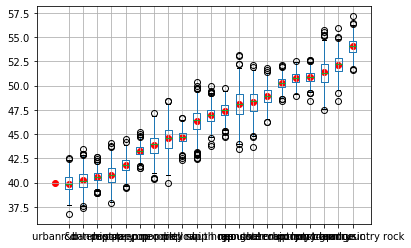

In [13]:
bootstrap_result.boxplot()
plt.scatter(y=real_peak_pos.values, x=real_peak_pos.keys(), color='red')
plt.show()

In [112]:
bootstrap_top5 = bootstrap_result.loc[:, real_peak_pos.index[1:6]]
bootstrap_bottom5 = bootstrap_result.loc[:, real_peak_pos.index[-5:]]
bootstrap_top5

,r&b,urban contemporary,dance pop,hip pop,post-teen pop
peak_pos,39.197761,40.469311,40.666543,40.755897,42.096958
peak_pos,39.559259,41.009251,40.965723,41.601805,42.371557
peak_pos,39.821805,40.685769,40.562017,42.925184,41.290052
peak_pos,39.356313,39.375490,40.415688,40.558761,40.290644
peak_pos,38.917818,39.280685,39.854212,40.503673,41.400981
peak_pos,39.031394,39.429816,40.214367,41.120293,40.983914
peak_pos,36.770149,37.777980,39.326554,38.503024,40.755749
peak_pos,39.290076,39.073367,40.197399,39.811966,41.543353
peak_pos,41.139464,41.174927,41.648496,41.374214,42.293316
peak_pos,39.013814,39.299129,39.924991,40.413757,42.134810


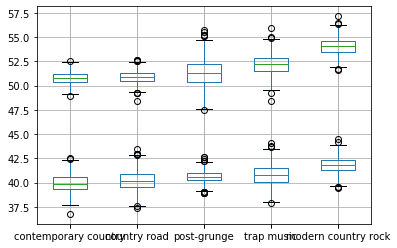

In [111]:
bootstrap_top5.boxplot()
bootstrap_bottom5.boxplot()

plt.show()

Olhando os resultados encontrados no boxplot a partir do bootstrap, percebemos que todas as médias estão no IC encontrado, logo não é possível rejeitar a hipótese nula. Ou seja, não é possível concluir que o gênero, por si só, impacta o potencial da música no top 100 da billboard.<br><br>

Contudo, olhando o segundo boxplot, que compara os cinco gêneros com maior média no peak_pos e os cinco gêneros com menor média no peak_pos, percebemos que os ICs não se cruzam, e, portanto, o fator gênero possui importância para determinar o quão alto a música vai no top 100, indicando que alguns gêneros(no exemplo, r&b, urban contemporary, dance pop, hip pop e post-teen pop) têm uma chance maior de alcançar posições mais altas.